In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 27.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Yolo8_classification/yolov8x-cls.pt")
model.train(data="/content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder",
            project="/content/drive/MyDrive/Yolo8_classification/",
            epochs=100,
            imgsz=224,
            device=0)

Ultralytics YOLOv8.0.82 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=/content/drive/MyDrive/Yolo8_classification/yolov8x-cls.pt, data=/content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/Yolo8_classification/, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnost

In [91]:
import numpy as numpy
import torch

from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Yolo8_classification/train/weights/best.pt")
result = model("/content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder/test/Wave/MAI_165733152_X449X600-jpg_uts-222402527_jpg.rf.f67e59fee1cef400d0f1cd796a5fbf9c.jpg")
print(torch.tensor(result[0].probs))
print(torch.tensor(result[0].probs.tolist()[0]))
print(torch.tensor(result[0].probs.tolist()[1]))
print(torch.tensor(result[0].probs.tolist()[2]))


image 1/1 /content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder/test/Wave/MAI_165733152_X449X600-jpg_uts-222402527_jpg.rf.f67e59fee1cef400d0f1cd796a5fbf9c.jpg: 224x224 Wave 0.49, Naturel 0.33, Straight 0.18, 14.0ms
Speed: 0.3ms preprocess, 14.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


tensor([0.3282, 0.1833, 0.4885], device='cuda:0')
tensor(0.3282)
tensor(0.1833)
tensor(0.4885)


<ipython-input-91-e5a73742b538>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(result[0].probs))



image 1/1 /content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder/test/Wave/MAI_165733152_X449X600-jpg_uts-222402527_jpg.rf.f67e59fee1cef400d0f1cd796a5fbf9c.jpg: 224x224 Wave 0.49, Naturel 0.33, Straight 0.18, 14.0ms
Speed: 0.3ms preprocess, 14.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
<ipython-input-90-433bd040254b>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores.append(round((torch.tensor(result[0].probs).tolist()[i])*100, 2))


<BarContainer object of 3 artists>

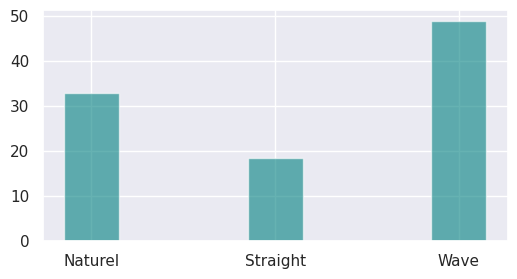

In [90]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

model = YOLO("/content/drive/MyDrive/Yolo8_classification/train/weights/best.pt")
result = model("/content/drive/MyDrive/Yolo8_classification/Clothing_Class_Model.v6i.folder/test/Wave/MAI_165733152_X449X600-jpg_uts-222402527_jpg.rf.f67e59fee1cef400d0f1cd796a5fbf9c.jpg")
names = []
scores = []

for i in range(0, 3):
  names.append(result[0].names[i])
  scores.append(round((torch.tensor(result[0].probs).tolist()[i])*100, 2))

plt.figure(figsize=(6, 3))
plt.bar(names,scores,width=0.3,color="teal",alpha=0.6)